## Algorithms for phase retrieval
Implementation for 
* Oversampling smoothness (OSS)

*References:* <br>
- *Fienup [1982](http://ao.osa.org/abstract.cfm?URI=ao-21-15-2758)*<br>
- *Rodriguez+[2013](https://doi.org/10.1107/S0021889813002471)*

** (continued from the other [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/notebooks/PR_PD-ER.ipynb))**

In [28]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

---
## Input (true images)
As usual, maximum 20% aberrations in both amplitude and phase. Randomly generated in Zernike coefficients (first 15)

In [3]:
coeff2 = np.random.random(15)
coeff1 = np.random.random(15)
P,P_,F,F_ = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2)

#### Oversampling
Zero-pad the pupil plane (object domain) image to for oversampling of 2 (Miao+[1998](http://dx.doi.org/10.1364/JOSAA.15.001662))

In [10]:
test = PR(pup=P,foc=F,oversamp=2)

### Run
#### 1. $\beta=0.5$

Caution: Pupil image is not used for constraints.
         This is one-image process.


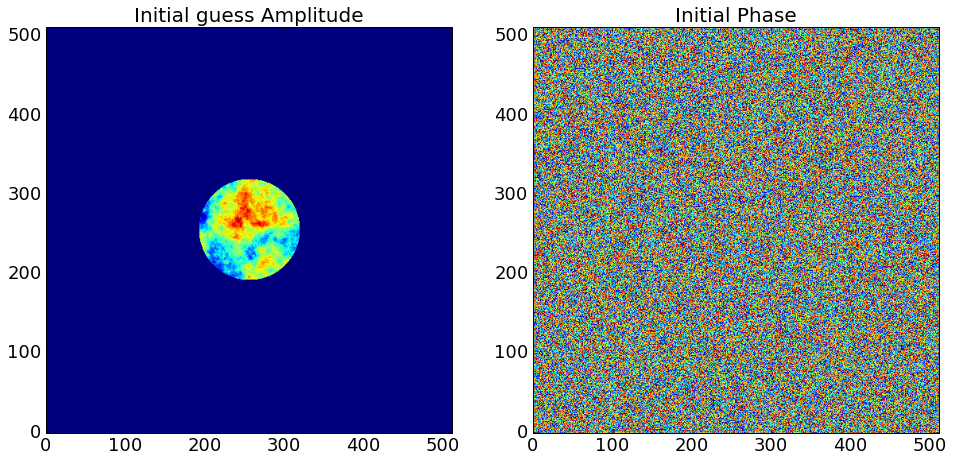

Current filter:


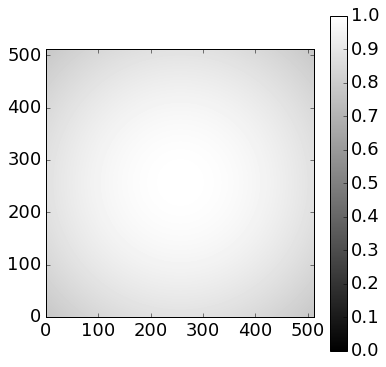

Current iter. : 100
        Error : 1.69e-03
Current iter. : 200
        Error : 1.69e-03
Current filter:


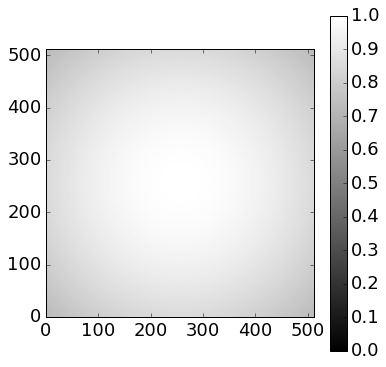

Current iter. : 300
        Error : 1.78e-03
Current iter. : 400
        Error : 1.85e-03
Current filter:


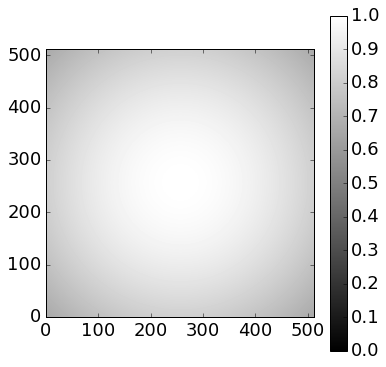

Current iter. : 500
        Error : 1.80e-03
Current iter. : 600
        Error : 1.88e-03
Current filter:


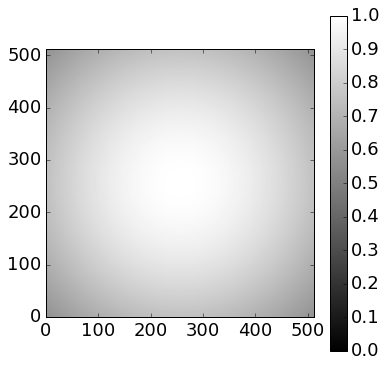

Current iter. : 700
        Error : 1.84e-03
Current iter. : 800
        Error : 1.94e-03
Current filter:


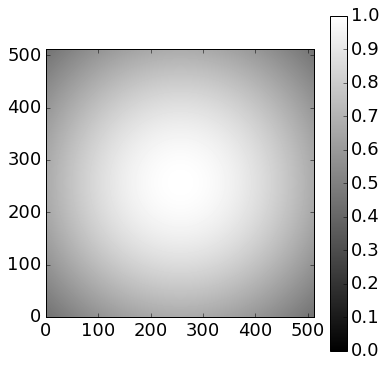

Current iter. : 900
        Error : 1.84e-03
Current iter. : 1000
        Error : 1.94e-03
Current filter:


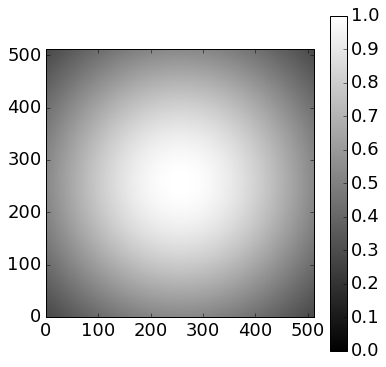

Current iter. : 1100
        Error : 1.82e-03
Current iter. : 1200
        Error : 1.93e-03
Current filter:


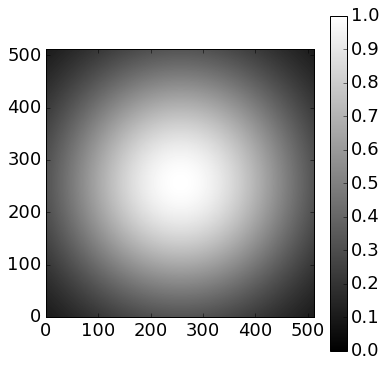

Current iter. : 1300
        Error : 1.80e-03
Current iter. : 1400
        Error : 1.92e-03
Current filter:


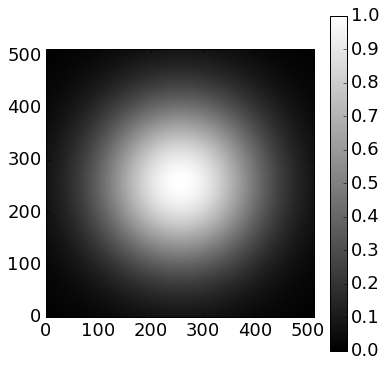

Current iter. : 1500
        Error : 1.83e-03
Current iter. : 1600
        Error : 1.99e-03
Current filter:


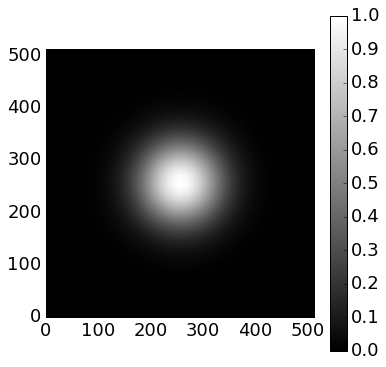

Current iter. : 1700
        Error : 2.16e-03
Current iter. : 1800
        Error : 2.41e-03
Current filter:


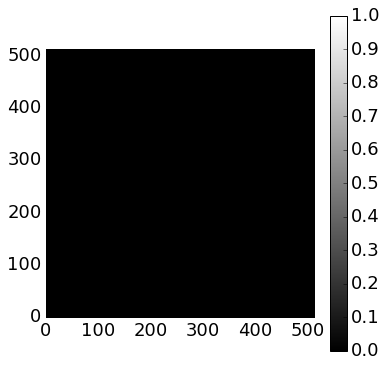

Current iter. : 1900
        Error : 2.39e-05
Current iter. : 2000
        Error : 1.78e-05
-----------------------
First iteration error: 1.01e-02
Final iteration : 2000
Final Error: 1.78e-05


In [11]:
OSS_pup,OSS_foc,OSS_errlist,OSS_pup_proj = test.OSS(beta=0.5,init='random')

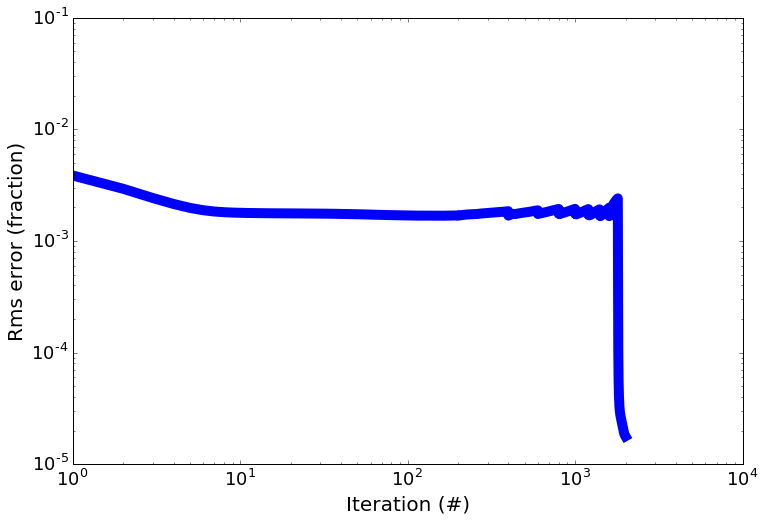

In [12]:
plot_errlist(OSS_errlist)

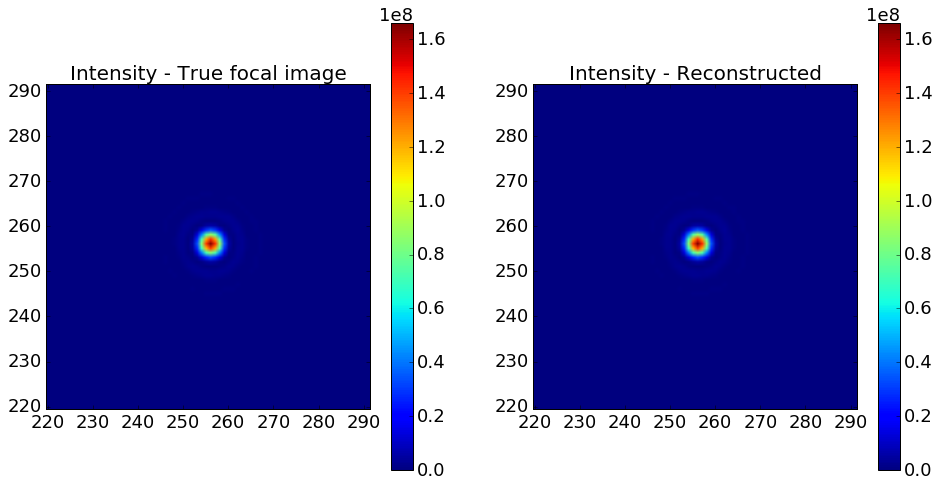

In [29]:
plot_recon(P_,F_,OSS_pup,OSS_foc,recons_clim=True)

Intriguing. The introduction of filtering suppresses essentially everything outside the support

In [30]:
plot_phase_residual(P_,F_,OSS_pup,OSS_foc)

Yet the phase reconstruction isn't so good.

#### 2. $\beta=0.7$

Caution: Pupil image is not used for constraints.
         This is one-image process.


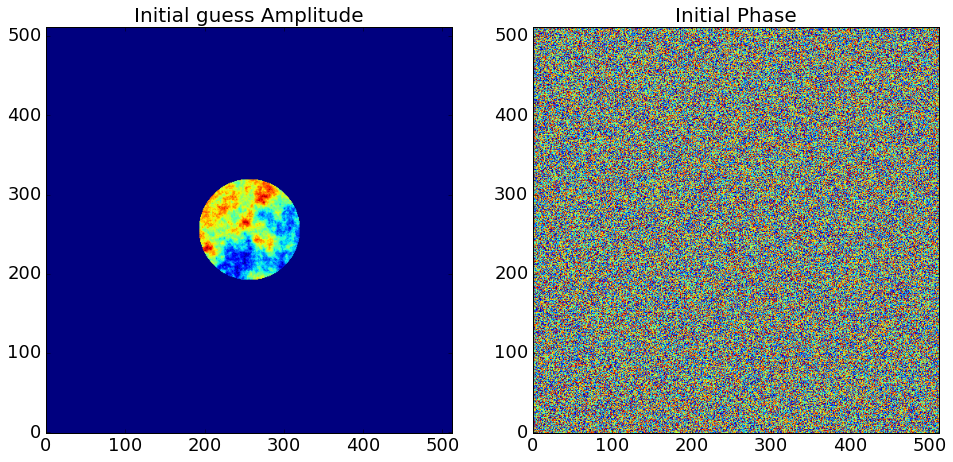

Current filter:


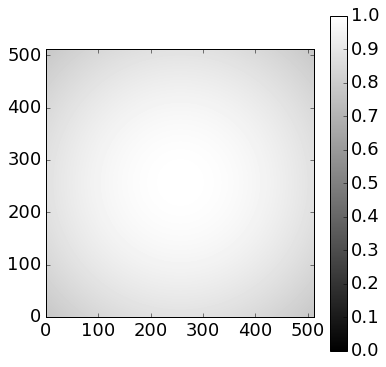

Current iter. : 100
        Error : 1.90e-03
Current iter. : 200
        Error : 1.79e-03
Current filter:


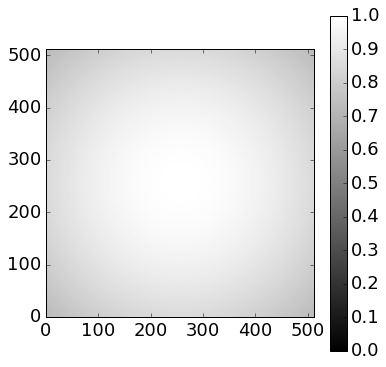

Current iter. : 300
        Error : 1.85e-03
Current iter. : 400
        Error : 1.92e-03
Current filter:


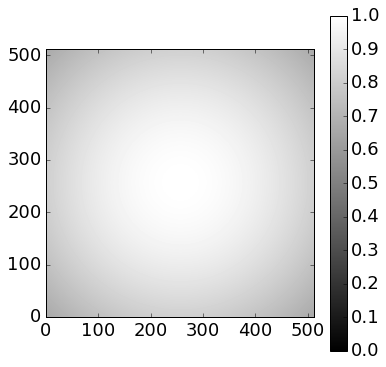

Current iter. : 500
        Error : 1.88e-03
Current iter. : 600
        Error : 1.97e-03
Current filter:


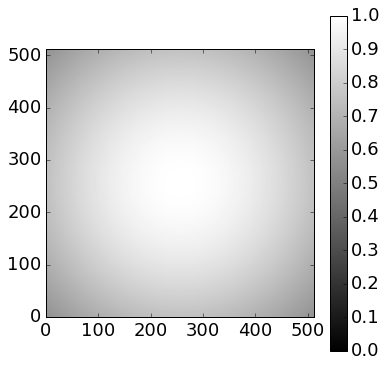

Current iter. : 700
        Error : 2.01e-03
Current iter. : 800
        Error : 2.09e-03
Current filter:


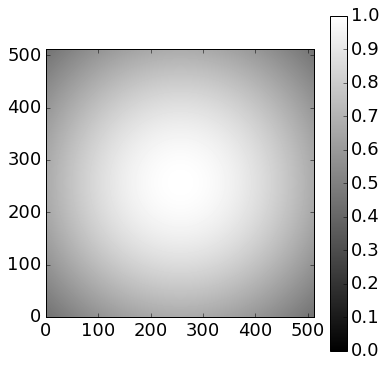

Current iter. : 900
        Error : 2.12e-03
Current iter. : 1000
        Error : 2.20e-03
Current filter:


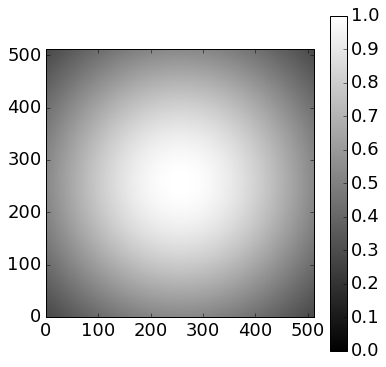

Current iter. : 1100
        Error : 2.14e-03
Current iter. : 1200
        Error : 2.21e-03
Current filter:


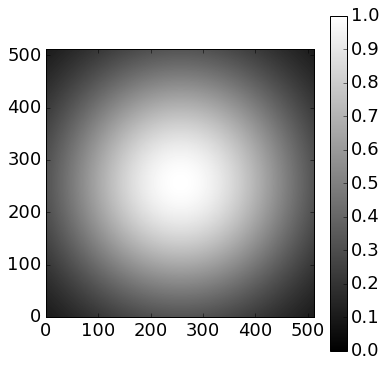

Current iter. : 1300
        Error : 2.19e-03
Current iter. : 1400
        Error : 2.26e-03
Current filter:


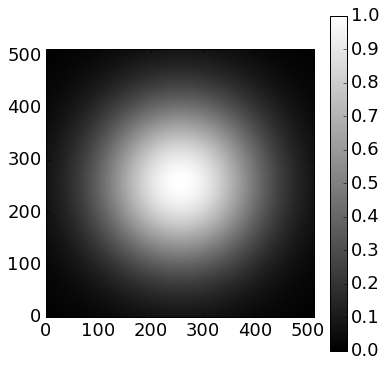

Current iter. : 1500
        Error : 2.24e-03
Current iter. : 1600
        Error : 2.33e-03
Current filter:


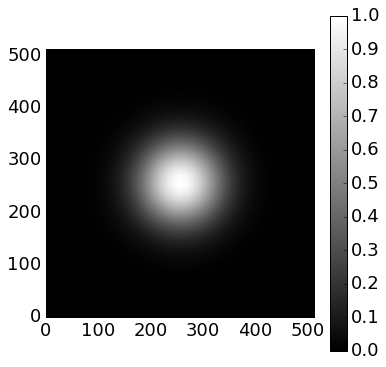

Current iter. : 1700
        Error : 2.47e-03
Current iter. : 1800
        Error : 2.65e-03
Current filter:


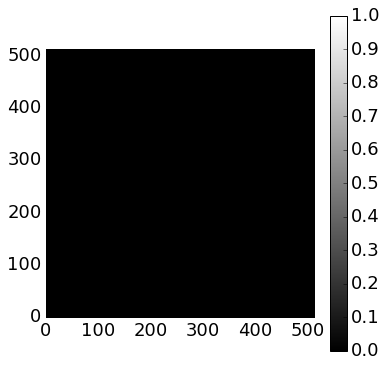

Current iter. : 1900
        Error : 2.11e-05
Current iter. : 2000
        Error : 1.82e-05
-----------------------
First iteration error: 1.06e-02
Final iteration : 2000
Final Error: 1.82e-05


In [14]:
OSS_pup7,OSS_foc7,OSS_errlist7,OSS_pup_proj7 = test.OSS(beta=0.7,init='random')

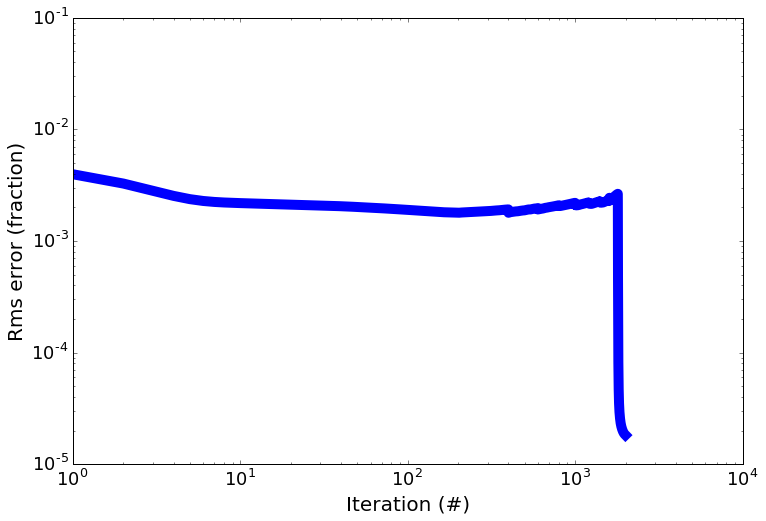

In [15]:
plot_errlist(OSS_errlist7)

Now I think the "cliff" near #1000 iteration is caused by the highly concentrated filter at those final 'steps'. In other words, the error evolution in OSS might not be a good representation of the "error", at least in the Fourier (Rodriguez _et al._ call it the "reciprocal") domain.

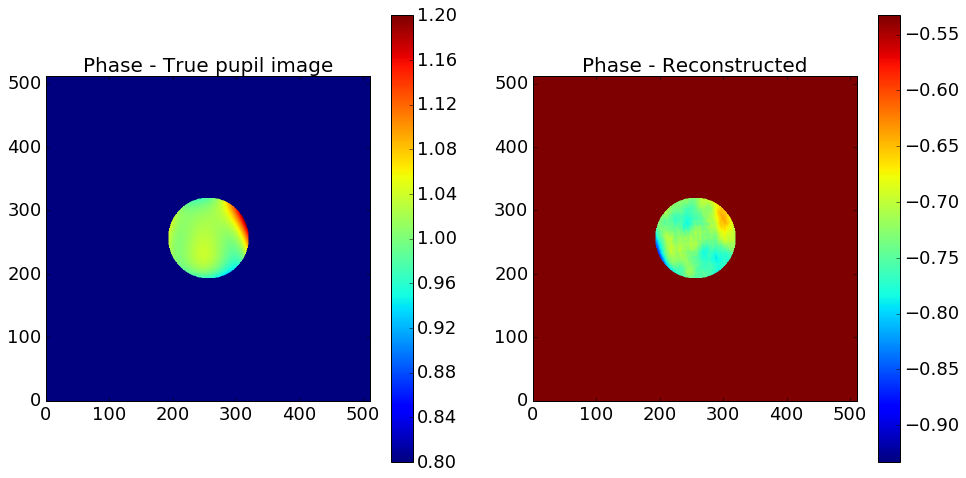

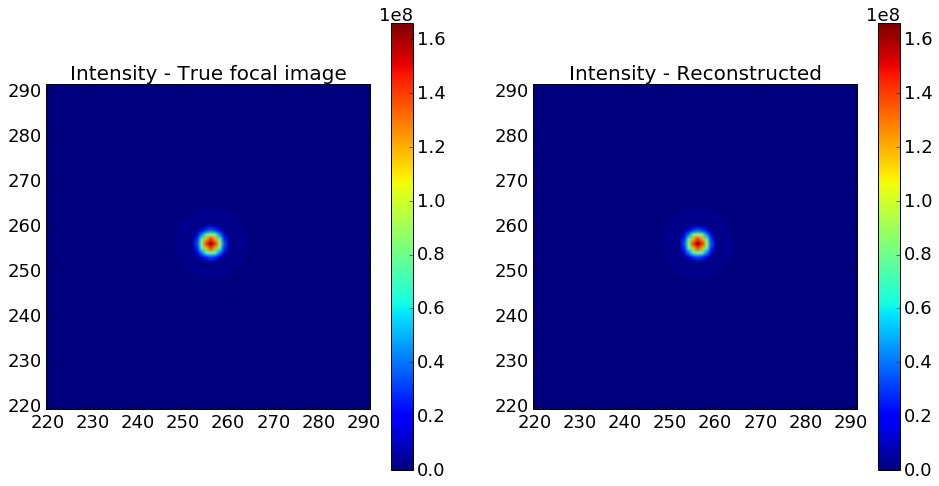

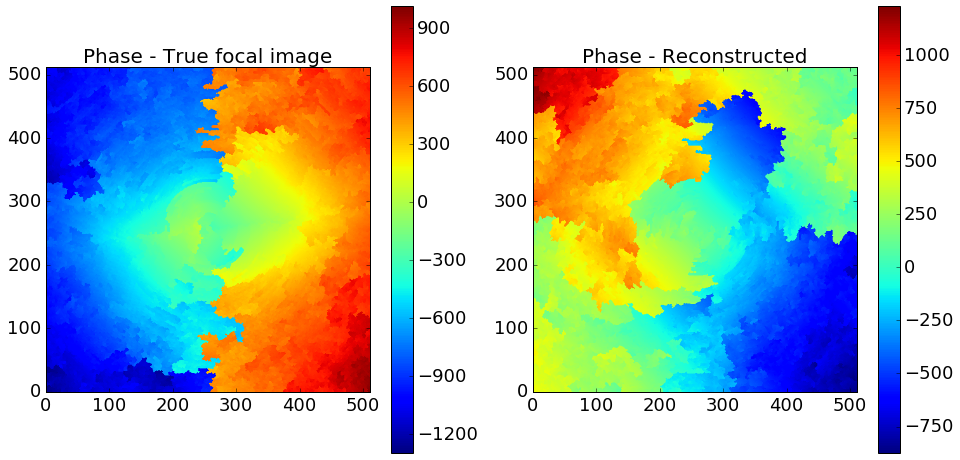

In [31]:
plot_recon(P_,F_,OSS_pup7,OSS_foc7,recons_clim=True)

In [32]:
plot_phase_residual(P_,F_,OSS_pup7,OSS_foc7)

Is $\beta$ of 0.7 a better choice? What about 1?

#### 2. $\beta=1$

Caution: Pupil image is not used for constraints.
         This is one-image process.


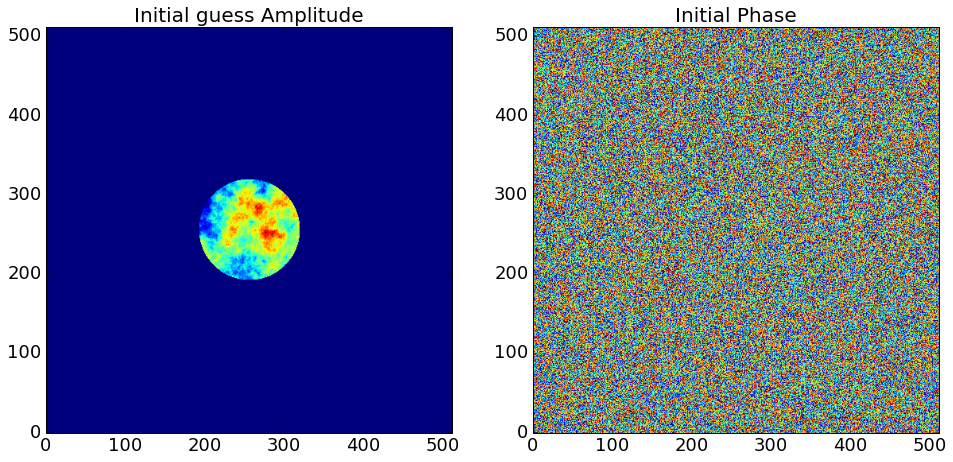

Current filter:


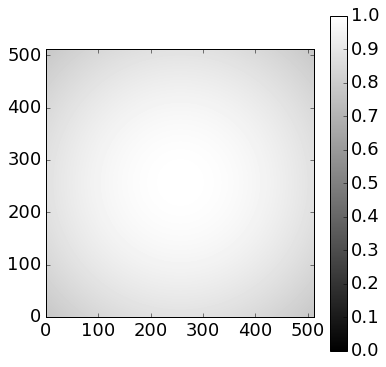

Current iter. : 100
        Error : 2.82e-03
Current iter. : 200
        Error : 2.63e-03
Current filter:


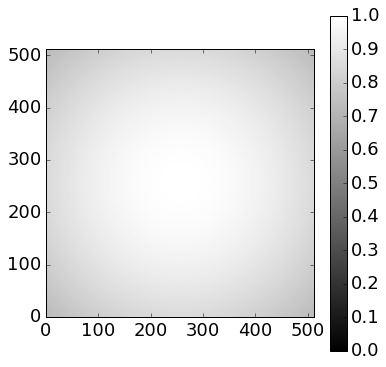

Current iter. : 300
        Error : 2.57e-03
Current iter. : 400
        Error : 2.54e-03
Current filter:


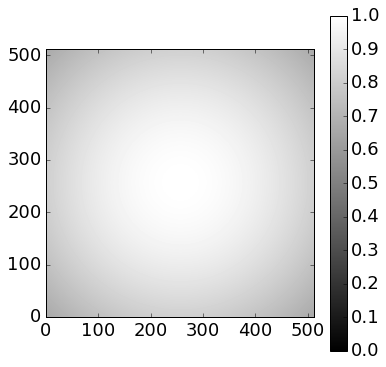

Current iter. : 500
        Error : 2.54e-03
Current iter. : 600
        Error : 2.54e-03
Current filter:


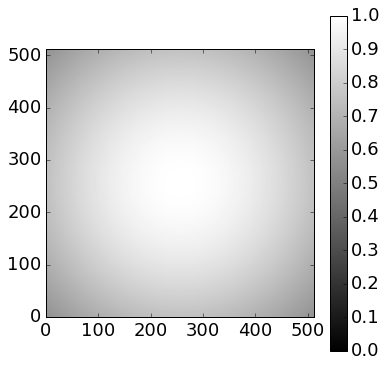

Current iter. : 700
        Error : 2.56e-03
Current iter. : 800
        Error : 2.58e-03
Current filter:


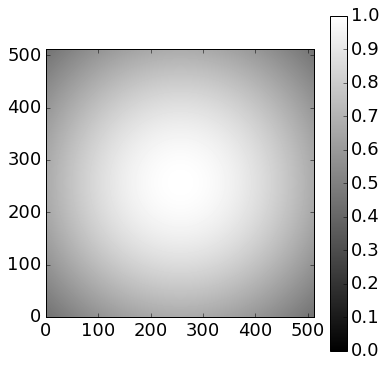

Current iter. : 900
        Error : 2.59e-03
Current iter. : 1000
        Error : 2.62e-03
Current filter:


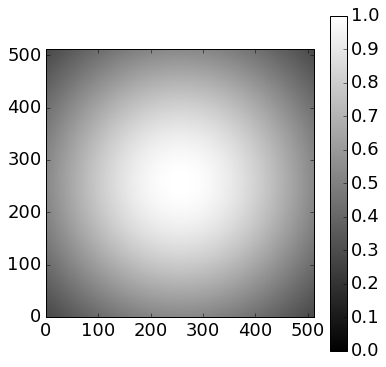

Current iter. : 1100
        Error : 2.62e-03
Current iter. : 1200
        Error : 2.65e-03
Current filter:


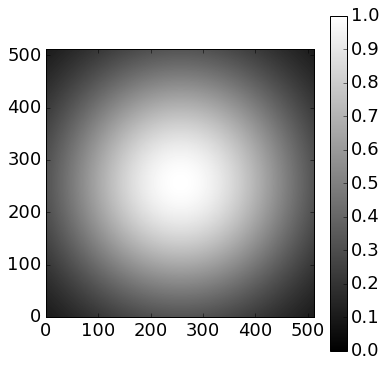

Current iter. : 1300
        Error : 2.60e-03
Current iter. : 1400
        Error : 2.64e-03
Current filter:


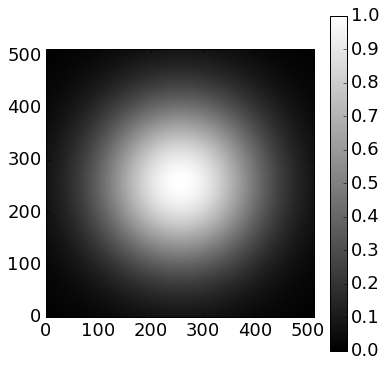

Current iter. : 1500
        Error : 2.53e-03
Current iter. : 1600
        Error : 2.57e-03
Current filter:


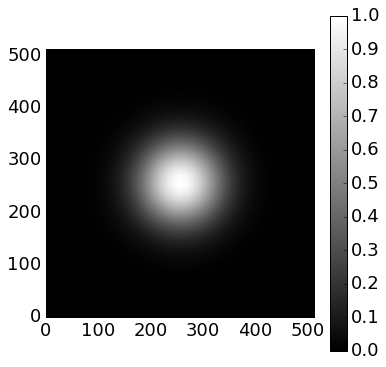

Current iter. : 1700
        Error : 2.60e-03
Current iter. : 1800
        Error : 2.75e-03
Current filter:


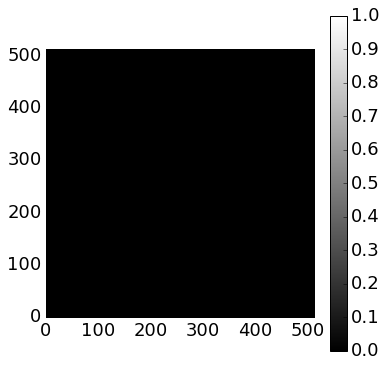

Current iter. : 1900
        Error : 2.33e-05
Current iter. : 2000
        Error : 2.14e-05
-----------------------
First iteration error: 1.03e-02
Final iteration : 2000
Final Error: 2.14e-05


In [17]:
OSS_pup1,OSS_foc1,OSS_errlist1,OSS_pup_proj1 = test.OSS(beta=1.,init='random')

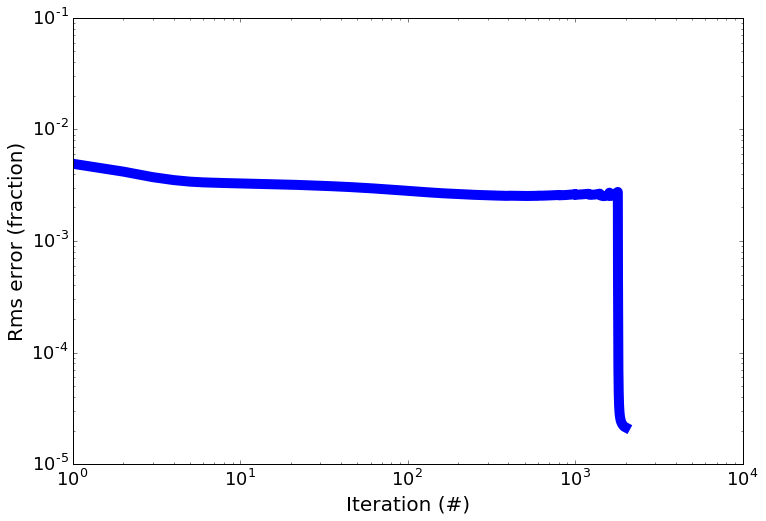

In [18]:
plot_errlist(OSS_errlist1)

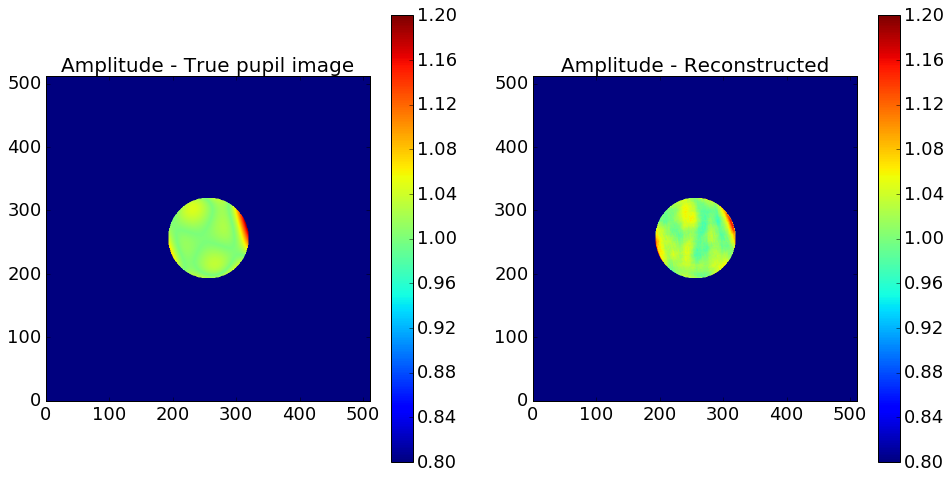

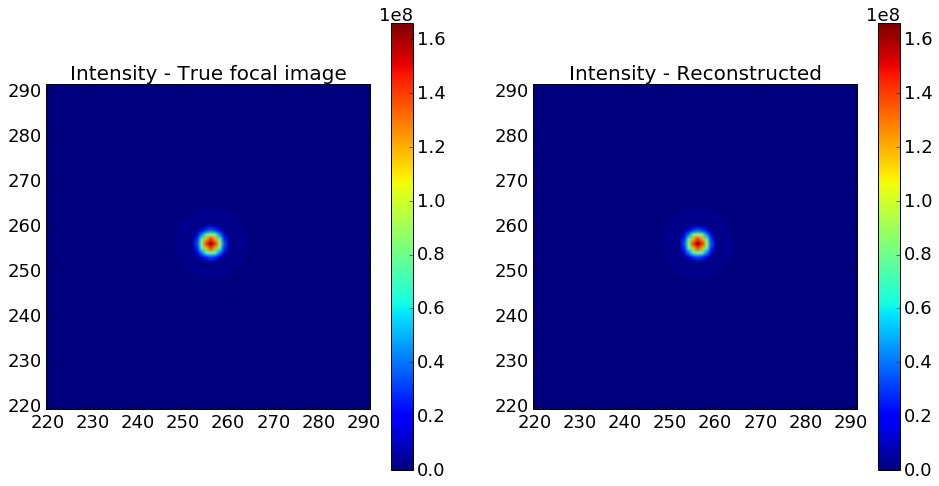

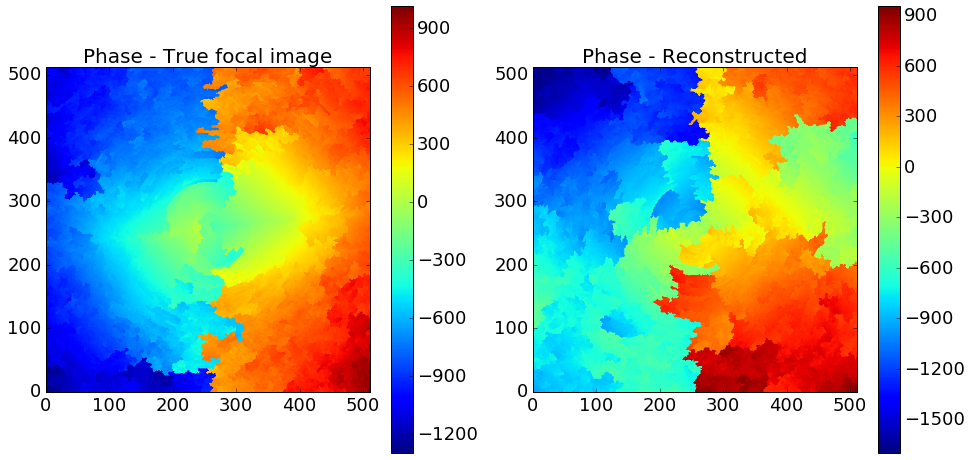

In [33]:
plot_recon(P_,F_,OSS_pup1,OSS_foc1,recons_clim=True)

Looks like smaller $\beta$ would produce better results. Yet $\alpha$ can be tuned as well so this can be very scenario-dependent.

In [34]:
plot_phase_residual(P_,F_,OSS_pup1,OSS_foc1)